In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

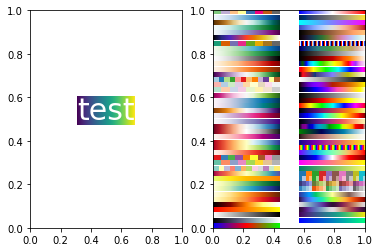

In [2]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

# ----------------------------
# create a BboxImage with Text
# ----------------------------
txt = ax1.text(0.5, 0.5, "test", size=30, ha="center", color="w")
kwargs = {}

bbox_image = BboxImage(txt.get_window_extent, norm=None, origin=None, clip_on=False, **kwargs)

a = np.arange(256).reshape(1, -1) / 256.0
bbox_image.set_data(a)
ax1.add_artist(bbox_image)

# ------------------------------------
# create a BboxImage for each colormap
# ------------------------------------
a = np.linspace(0, 1, 256).reshape(1, -1)
a = np.vstack((a, a))

# list of all colormaps & skip reversed colormaps
cmap_names = sorted(m for m in plt.colormaps if not m.endswith("_r"))

n_cols = 2
n_rows = len(cmap_names) // n_cols + 1

xpad_fraction = 0.3
ypad_fraction = 0.3
dx = 1 / (n_cols + xpad_fraction * (n_cols - 1))
dy = 1 / (n_rows + ypad_fraction * (n_rows - 1))

for i, cmap_name in enumerate(cmap_names):
    ix, iy = divmod(i, n_rows)
    
    bbox1 = Bbox.from_bounds(
        ix * dx * (1 + xpad_fraction),
        1.0 - iy * dy * (1 + ypad_fraction) - dy,
        dx, dy,
    )
    bbox2 = TransformedBbox(bbox1, ax2.transAxes)
    
    bbox_image = BboxImage(bbox2, cmap=cmap_name, norm=None, origin=None, **kwargs)
    bbox_image.set_data(a)
    ax2.add_artist(bbox_image)

plt.show()